In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

os.chdir("/Users/davidcoope/Desktop/BayesianOptimiser")
import BOPackage

In [7]:
def Gardner(X):
    x1 = X[:, 0]
    x2 = X[:, 1]

    # Calculate the objective function value
    y = np.sin(x1) + x2
    
    # Apply the constraint
    constraint = np.sin(x1) * np.sin(x2) + 0.95 > 0
    
    # Apply penalty for constraint violation
    y[constraint] = 20
    
    # Make function negative to find the minimum
    y = -y.reshape(-1, 1)
    
    return y

bounds = np.array([[0, 2*np.pi], [0, 2*np.pi]])

length_scale = 2*np.pi
acquisition_samples = 100
ObjectiveFunction = Gardner

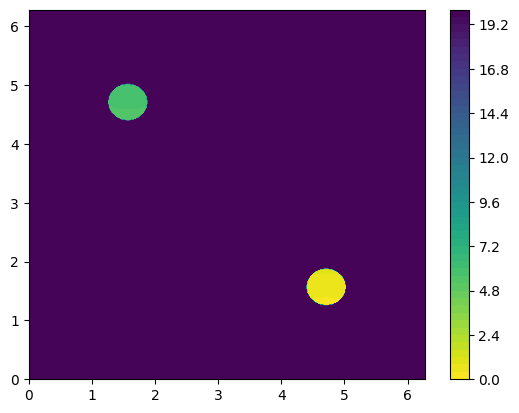

In [8]:
X1 = np.linspace(bounds[0,0], bounds[0,1], 501, endpoint=True)
X2 = np.linspace(bounds[1,0], bounds[1,1], 501, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.c_[X1_grid.ravel(), X2_grid.ravel()]

result = -ObjectiveFunction(candidate_x).reshape(X1_grid.shape)

# Plot the contour
contour = plt.contourf(X1, X2, result, levels=50, cmap='viridis_r')

# Add a color bar
plt.colorbar(contour)

# Show the plot
plt.show()

In [9]:
"""
Configure the optimiser.
"""
random_seed = 50

Kernel = BOPackage.RBF_Kernel

AcquisitionFunction = BOPackage.UpperConfidenceBound
max_kappa = 1
min_kappa = 0.05

reduce_bounds_factor = 0.5

# log_path = '/Users/davidcoope/Desktop/BayesianOptimiser/BraninHoo/BOlog.log'

# if os.path.exists(log_path):   
#     subprocess.run(['rm', '-rf', log_path], check=True, text=True, capture_output=True)  

In [10]:
"""
Configure the optimiser for the standard configuration.
"""

dynamic_bounds = False

# Create the object
bo1 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=None,
                  first_reduce_bounds=None,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo1.GetRandomXBatch(1)
raw_y = ObjectiveFunction(raw_X)
bo1.UpdateData(raw_X, raw_y)

for i in range(299):
    raw_X = bo1.GetNextX(kappa=0.1)
    raw_y = ObjectiveFunction(np.array(raw_X))
    bo1.UpdateData(raw_X, raw_y)

bo1.PrintCurrentStatus()
print(bo1.bounds)
# BOPackage.PlotData(bo1)

BO1 = bo1.BestData()[1][0]

/Users/davidcoope/Desktop/BayesianOptimiser/BOPackage.py:145: RuntimeWarning: invalid value encountered in sqrt
  candidate_y = self.AcquisitionFunction(self.mean, np.sqrt(self.variance), kappa)


Current best y value was [-0.27141422]; the corresponding X values were [4.78472724 1.26879895]
[[0.         6.28318531]
 [0.         6.28318531]]


In [11]:
"""
Configure the optimiser with bounds.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 30
first_reduce_bounds = 100  

# Create the object
bo2 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo2.GetRandomXBatch(1)
raw_y = ObjectiveFunction(raw_X)
bo2.UpdateData(raw_X, raw_y)

for i in range(299):
    raw_X = bo2.GetNextX(kappa=0.1)
    raw_y = ObjectiveFunction(np.array(raw_X))
    bo2.UpdateData(raw_X, raw_y)

bo2.PrintCurrentStatus()
print(bo2.bounds)
# BOPackage.PlotData(bo2)

BO2 = bo2.BestData()[1][0]

Current best y value was [-0.2574526]; the corresponding X values were [4.68580521 1.25709927]
The bounds have been reduced 7 times
[[4.66126151 4.7103489 ]
 [1.24572875 1.29481614]]


In [12]:
"""
Configure the optimiser with batch sampling.
"""

dynamic_bounds = False

# Create the object
bo3 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo3.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo3.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo3.GetNextXBatch(10, sub_batch_size=10, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo3.UpdateData(raw_X, raw_y)

bo3.PrintCurrentStatus()
print(bo3.bounds)
# BOPackage.PlotData(bo3)

BO3 = bo3.BestData()[1][0]

Current best y value was [-0.27141422]; the corresponding X values were [4.78472724 1.26879895]
[[0.         6.28318531]
 [0.         6.28318531]]


/Users/davidcoope/Desktop/BayesianOptimiser/BOPackage.py:143: RuntimeWarning: invalid value encountered in sqrt
  candidate_y = self.AcquisitionFunction(self.mean, np.sqrt(self.variance))


In [13]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 50 

# Create the object
bo6 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo6.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo6.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo6.GetNextXBatch(10, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo6.UpdateData(raw_X, raw_y)

bo6.PrintCurrentStatus()
print(bo6.bounds)
# BOPackage.PlotData(bo5)

BO6 = bo6.BestData()[1][0]

Current best y value was [-0.27141422]; the corresponding X values were [4.78472724 1.26879895]
The bounds have been reduced 0 times
[[0.         6.28318531]
 [0.         6.28318531]]


In [14]:
"""
Configure the optimiser with sub-batch sampling.
"""

dynamic_bounds = False

# Create the object
bo4 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo4.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo4.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo4.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo4.UpdateData(raw_X, raw_y)

bo4.PrintCurrentStatus()
print(bo4.bounds)
# BOPackage.PlotData(bo4)

BO4 = bo4.BestData()[1][0]

Current best y value was [-5.3966655]; the corresponding X values were [1.56458399 4.3966848 ]
[[0.         6.28318531]
 [0.         6.28318531]]


In [15]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo5 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo5.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo5.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo5.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo5.UpdateData(raw_X, raw_y)
    

bo5.PrintCurrentStatus()
print(bo5.bounds)
# BOPackage.PlotData(bo5)

BO5 = bo5.BestData()[1][0]

Current best y value was [-5.45579557]; the corresponding X values were [1.74067573 4.47019041]
The bounds have been reduced 5 times
[[1.64250096 1.8388505 ]
 [4.37201564 4.56836518]]


In [16]:
"""
Configure the optimiser with sub-batch sampling.
"""

dynamic_bounds = False

# Create the object
bo7 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo7.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo7.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo4.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo7.UpdateData(raw_X, raw_y)

bo7.PrintCurrentStatus()
print(bo7.bounds)
# BOPackage.PlotData(bo4)

BO7 = bo7.BestData()[1][0]

Current best y value was [-5.41980962]; the corresponding X values were [1.60655077 4.42044874]
[[0.         6.28318531]
 [0.         6.28318531]]


In [17]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo8 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo8.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo8.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo8.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo8.UpdateData(raw_X, raw_y)
    

bo8.PrintCurrentStatus()
print(bo8.bounds)
# BOPackage.PlotData(bo5)

BO8 = bo8.BestData()[1][0]

Current best y value was [-5.45579557]; the corresponding X values were [1.74067573 4.47019041]
The bounds have been reduced 5 times
[[1.64250096 1.8388505 ]
 [4.37201564 4.56836518]]


In [18]:
print(BO1, BO2, BO3, BO6, BO4, BO5, BO7, BO8)

[-0.27141422] [-0.2574526] [-0.27141422] [-0.27141422] [-5.3966655] [-5.45579557] [-5.41980962] [-5.45579557]
